## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## load the data into dataframe

In [ ]:
df = pd.read_csv('/content/drive/My Drive/machine learning/classification/data/Human_Activity_Recognition_Using_Smartphones_Data.csv')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.991364,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.991134,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.986658,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.99570

In [ ]:
df.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [ ]:
df.dtypes.tail(5)

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum).

In [ ]:
df.iloc[:,:-1].min().value_counts()

-1.0    561
dtype: int64

In [ ]:
df.iloc[:,:-1].max().value_counts()

1.0    561
dtype: int64

In [ ]:
df.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder =LabelEncoder()
df['Activity']=encoder.fit_transform(df.Activity)
df['Activity'].sample(10)

4595    1
8576    2
6970    2
7015    1
1493    2
116     3
8463    0
8982    3
4637    3
8581    1
Name: Activity, dtype: int64

In [ ]:
## calculate correlations 

feature_cols =df.columns[:-1]
corr_values = df[feature_cols].corr()


In [ ]:
corr_values

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.000000,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,-0.007160,-0.063463,0.075945,0.014040,-0.008399,-0.022104,0.022322,-0.027758,-0.071459,0.025111,-0.019118,-0.045154,0.142928,0.005005,-0.076582,0.019124,0.011382,-0.035169,0.046855,0.025448,0.010860,-0.042980,0.057837,0.026440,0.020344,-0.029332,0.009007,0.034608,0.087356,-0.016107,...,0.039006,0.023272,-0.003525,0.019647,0.057719,-0.017269,-0.008403,-0.001544,-0.021697,-0.016735,-0.025636,0.004710,-0.001544,-0.008736,0.000693,-0.014239,0.030077,0.049826,-0.022028,-0.016047,0.012586,0.012131,0.011272,0.015367,0.008976,0.012586,0.021087,0.014885,-0.012608,0.008264,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,0.128037,1.000000,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,0.078824,-0.053540,0.058370,0.127401,0.045267,-0.048882,-0.031910,-0.061360,-0.063719,-0.043484,-0.050233,-0.059863,-0.012367,0.189721,-0.014283,0.039320,-0.044883,0.038690,-0.039446,0.029335,-0.033690,0.021699,-0.009751,0.026110,-0.025836,0.018232,-0.017012,-0.005566,0.013731,0.044164,...,-0.033986,-0.046984,-0.050245,-0.002061,-0.006128,-0.004499,-0.005285,-0.049149,-0.056186,-0.056858,-0.054309,-0.016517,-0.049149,-0.047181,-0.053767,-0.044743,-0.000097,0.006282,0.001494,0.000630,-0.037025,-0.035333,-0.037025,-0.032402,-0.029796,-0.037025,-0.022151,-0.040368,-0.043523,-0.005741,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,-0.230302,-0.029882,1.000000,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,-0.026357,0.101016,0.012058,0.024924,0.121513,-0.014513,-0.014329,-0.013147,0.013531,-0.021312,-0.022315,0.004248,-0.083051,0.001019,0.288887,0.006707,-0.003305,-0.002206,-0.009019,0.007091,-0.015371,0.009631,0.001552,0.012618,-0.020143,0.012080,-0.004510,0.025463,-0.023700,0.012264,...,-0.025649,-0.035431,-0.028168,-0.018069,-0.030002,0.030787,0

In [ ]:
## we are going to empty the half triangle through diagonal

In [ ]:
tril_index = np.tril_indices_from(corr_values)

In [ ]:
tril_index

(array([  0,   1,   1, ..., 560, 560, 560]),
 array([  0,   0,   1, ..., 558, 559, 560]))

In [ ]:
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN

In [ ]:
tril_index

(array([  0,   1,   1, ..., 560, 560, 560]),
 array([  0,   0,   1, ..., 558, 559, 560]))

In [ ]:
corr_values = (corr_values.stack().to_frame().reset_index().rename(columns={'level_0':'feature1','level_1':'feature2',0:'correlation'}))

In [ ]:
corr_values

,feature1,feature2,correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071
...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231


In [ ]:
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [ ]:
corr_values

,feature1,feature2,correlation,abs_correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302,0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785,0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071,0.036071
...,...,...,...,...
157075,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582,0.004582
157076,"angle(tBodyGyroJerkMean,gravityMean)","angle(Z,gravityMean)",-0.012549,0.012549
157077,"angle(X,gravityMean)","angle(Y,gravityMean)",-0.748249,0.748249
157078,"angle(X,gravityMean)","angle(Z,gravityMean)",-0.635231,0.635231


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


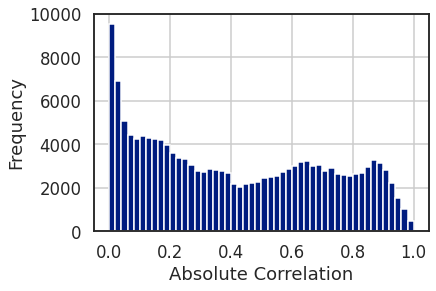

In [ ]:
sns.set_context('talk',)
sns.set_style('white')
sns.set_palette('dark')

ax = corr_values.abs_correlation.hist(bins=50)
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [ ]:
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(df[feature_cols],df['Activity'],test_size = 0.2,random_state = 42)

In [ ]:
y_train.value_counts(normalize=True)

2    0.188372
0    0.186673
1    0.169924
3    0.164219
5    0.154630
4    0.136182
Name: Activity, dtype: float64

In [ ]:
y_train.value_counts(ascending=False)

2    1552
0    1538
1    1400
3    1353
5    1274
4    1122
Name: Activity, dtype: int64

In [ ]:
y_test.value_counts(ascending=True)

5    270
4    284
2    354
3    369
1    377
0    406
Name: Activity, dtype: int64

In [ ]:
y_test.value_counts(normalize=True)

0    0.197087
1    0.183010
3    0.179126
2    0.171845
4    0.137864
5    0.131068
Name: Activity, dtype: float64

In [ ]:
# fit the model logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
lr.score(X_test,y_test)

0.9815533980582525

In [ ]:
## hyperparameter use

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
lr_l1 = LogisticRegressionCV(penalty = 'l1',cv= 4,Cs=10,solver='liblinear').fit(X_train,y_train)

In [ ]:
lr_l1.score(X_test,y_test)

0.9859223300970874

In [ ]:
## we increase score 

In [ ]:
## WE CAREATING HYPERPARAMETER FOR RANDMIZE SEARCH

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
logistic_regression = LogisticRegression(random_state=42)

penalty = ['l1','l2','elasticnet']
tol = [1e-4,1e-3,1e-2,1e-1,1,1e+1,1e+2,1e+3,1e+4]
C= np.arange(1e-4,1e+4,0.05)
solver = ['lbfgs','sag','liblinear',]
l1_ratio = [0,0.5,1]



In [ ]:
parameter = {
             'tol':tol,
             'C':C,
             'solver':solver,
             }
parameter

{'C': array([1.0000000e-04, 5.0100000e-02, 1.0010000e-01, ..., 9.9998501e+03,
        9.9999001e+03, 9.9999501e+03]),
 'solver': ['lbfgs', 'sag', 'liblinear'],
 'tol': [0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0, 10000.0]}

In [ ]:
random_search = RandomizedSearchCV(logistic_regression,param_distributions=parameter,cv=5)

In [ ]:
random_search.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=42,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': array([1.0000000e-04, 5.0100000e-02, 1.0010000e-01, ..., 9.9998501e+03,
       9.9999001e+03, 9.9999501e+03]),
                                        'solver': ['lbfgs', 'sag', 'liblinear'],
                                        'tol':

In [ ]:
random_search.best_estimator_

LogisticRegression(C=3696.4501000000005, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.001, verbose=0,
                   warm_start=False)

In [ ]:
random_search.best_params_

{'C': 3696.4501000000005, 'solver': 'liblinear', 'tol': 0.001}

In [ ]:
random_search.best_score_

0.9821579099392246